<a href="https://colab.research.google.com/github/imdeepmind/CrowdCounter/blob/master/Crowd_Counter_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Getting the dataset into proper place
!mkdir data
!cp '/content/drive/My Drive/datasets/dataset.zip' ./
!unzip -qq dataset.zip -d ./data/
!rm dataset.zip

In [4]:
# Script to generate the processed.csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

labels = pd.read_csv('data/labels.csv')

preprocessed_labels = []
preprocessed_images = []

images = os.listdir("/content/data/frames/frames")

for (id, count) in labels.values:
  preprocessed_labels.append(count)
  preprocessed_images.append(images[id-1])

df = pd.DataFrame(columns=['image', 'count'])
df['image'] = preprocessed_images
df['count'] = preprocessed_labels

df.head()

df.to_csv('./data/processed.csv', index=False)

In [16]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Reading data
data = pd.read_csv("./data/processed.csv")

data.head()

,image,count
0,seq_000269.jpg,35
1,seq_000217.jpg,41
2,seq_001471.jpg,41
3,seq_001249.jpg,44
4,seq_000095.jpg,41


In [7]:
train, test = train_test_split(data, test_size=0.1, random_state=1969)

train.head()

,image,count
261,seq_001554.jpg,18
962,seq_001363.jpg,31
592,seq_000611.jpg,25
884,seq_000344.jpg,25
84,seq_001697.jpg,31


In [10]:
train_generator = ImageDataGenerator(rotation_range=180, zoom_range=1.0, horizontal_flip=True, vertical_flip=True, rescale=1/255., validation_split=0.1)
test_generator = ImageDataGenerator(rescale=1/255.)


In [11]:
train_data = train_generator.flow_from_dataframe(train, 
                                                 directory='./data/frames/frames/', 
                                                 x_col='image', 
                                                 y_col='count', 
                                                 target_size=(256, 256),
                                                 color_mode='rgb',
                                                 class_mode='raw',
                                                 batch_size=32,
                                                 shuffle=True)

test_data = test_generator.flow_from_dataframe(test, 
                                                 directory='./data/frames/frames/', 
                                                 x_col='image', 
                                                 y_col='count', 
                                                 target_size=(256, 256),
                                                 color_mode='rgb',
                                                 class_mode='raw',
                                                 batch_size=32,
                                                 shuffle=True)


Found 1800 validated image filenames.
Found 200 validated image filenames.


In [12]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [13]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

In [25]:
history = model.fit(train_data, 
          steps_per_epoch=1800//32,
          validation_data=test_data,
          validation_steps=200//32,
          epochs=10)

Epoch 1/10
56/56 [==============================] - 33s 593ms/step - loss: 960.5911 - mse: 960.5911 - val_loss: 955.9114 - val_mse: 955.9114
Epoch 2/10
56/56 [==============================] - 33s 590ms/step - loss: 960.0967 - mse: 960.0967 - val_loss: 952.7761 - val_mse: 952.7761
Epoch 3/10
56/56 [==============================] - 33s 585ms/step - loss: 958.4548 - mse: 958.4548 - val_loss: 951.4896 - val_mse: 951.4896
Epoch 4/10
56/56 [==============================] - 33s 586ms/step - loss: 959.7562 - mse: 959.7562 - val_loss: 950.5417 - val_mse: 950.5417
Epoch 5/10
56/56 [==============================] - 33s 588ms/step - loss: 960.3869 - mse: 960.3869 - val_loss: 959.4427 - val_mse: 959.4427
Epoch 6/10
56/56 [==============================] - 33s 583ms/step - loss: 955.5204 - mse: 955.5204 - val_loss: 950.5625 - val_mse: 950.5625
Epoch 7/10
56/56 [==============================] - 33s 596ms/step - loss: 955.7460 - mse: 955.7460 - val_loss: 955.7396 - val_mse: 955.7396
Epoch 8/10
56

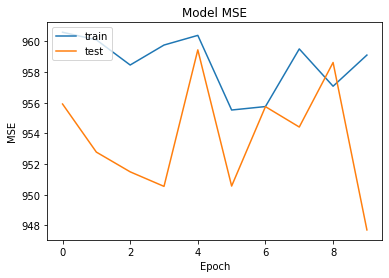

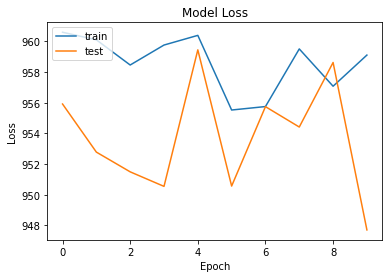

In [26]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()